In [530]:
import numpy as np
import pandas as pd

In [531]:
experimentB = pd.read_csv("Survey_B.csv")

In [532]:
experimentB.head()

,Gender,Age,Perfect_Pitch,Listen_Music,Played_Instruement,Years,Control,Sequence1,Sequence1_Timing,Sequence2,Sequence2_Timing,Sequence3,Sequence3_Timing,Sequence4,Sequence4_Timing,Notes,Easiest
0,Male,20.0,No,Yes,Yes,5,Higher,Same,Earlier,Lower,Expected,Higher,Later,Lower,Later,NaN,Question 1
1,Female,20.0,No,Yes,No,0,Higher,Higher,Later,Lower,Later,Higher,Expected,Higher,Later,NaN,Question 1
2,Male,20.0,No,Yes,Yes,8,Higher,Higher,Expected,Lower,Earlier,Higher,Earlier,Higher,Expected,NaN,Question 4
3,Male,20.0,No,Yes,Yes,8,Lower,Higher,Earlier,Same,Earlier,Lower,Earlier,Higher,Expected,NaN,Question 1
4,Male,18.0,No,Yes,Yes,4,Higher,Higher,Earlier,Higher,Later,Same,Earlier,Higher,Expected,NaN,Question 1


# Part 1: Exploratory Data Analysis

## Data Cleaning

In this experiment, participants were given a two note sequance and asked to rate whether the second note was a higher or lower pitch than the first note. This sequance was D, D#, with the correct anwser being HIGHER as D# is higher than D. Participants that failed this inital test are excluded from the analysis.

In [533]:
experimentB = experimentB[experimentB['Control'] == "Higher"]
experimentB.head()


,Gender,Age,Perfect_Pitch,Listen_Music,Played_Instruement,Years,Control,Sequence1,Sequence1_Timing,Sequence2,Sequence2_Timing,Sequence3,Sequence3_Timing,Sequence4,Sequence4_Timing,Notes,Easiest
0,Male,20.0,No,Yes,Yes,5,Higher,Same,Earlier,Lower,Expected,Higher,Later,Lower,Later,NaN,Question 1
1,Female,20.0,No,Yes,No,0,Higher,Higher,Later,Lower,Later,Higher,Expected,Higher,Later,NaN,Question 1
2,Male,20.0,No,Yes,Yes,8,Higher,Higher,Expected,Lower,Earlier,Higher,Earlier,Higher,Expected,NaN,Question 4
4,Male,18.0,No,Yes,Yes,4,Higher,Higher,Earlier,Higher,Later,Same,Earlier,Higher,Expected,NaN,Question 1
5,Female,20.0,No,Yes,Yes,3,Higher,Higher,Expected,Lower,Earlier,Higher,Expected,Higher,Expected,NaN,Question 1


In [534]:
experimentB.loc[(experimentB.Sequence1 != 'Higher'),'Sequence1']='Incorrect'
experimentB.loc[(experimentB.Sequence1 == 'Higher'),'Sequence1']='Correct'

experimentB.loc[(experimentB.Sequence2 != 'Lower'),'Sequence2']='Incorrect'
experimentB.loc[(experimentB.Sequence2 == 'Lower'),'Sequence2']='Correct'

experimentB.loc[(experimentB.Sequence3 != 'Higher'),'Sequence3']='Incorrect'
experimentB.loc[(experimentB.Sequence3 == 'Higher'),'Sequence3']='Correct'

experimentB.loc[(experimentB.Sequence4 != 'Higher'),'Sequence4']='Incorrect'
experimentB.loc[(experimentB.Sequence4 == 'Higher'),'Sequence4']='Correct'


experimentB.head()

,Gender,Age,Perfect_Pitch,Listen_Music,Played_Instruement,Years,Control,Sequence1,Sequence1_Timing,Sequence2,Sequence2_Timing,Sequence3,Sequence3_Timing,Sequence4,Sequence4_Timing,Notes,Easiest
0,Male,20.0,No,Yes,Yes,5,Higher,Incorrect,Earlier,Correct,Expected,Correct,Later,Incorrect,Later,NaN,Question 1
1,Female,20.0,No,Yes,No,0,Higher,Correct,Later,Correct,Later,Correct,Expected,Correct,Later,NaN,Question 1
2,Male,20.0,No,Yes,Yes,8,Higher,Correct,Expected,Correct,Earlier,Correct,Earlier,Correct,Expected,NaN,Question 4
4,Male,18.0,No,Yes,Yes,4,Higher,Correct,Earlier,Incorrect,Later,Incorrect,Earlier,Correct,Expected,NaN,Question 1
5,Female,20.0,No,Yes,Yes,3,Higher,Correct,Expected,Correct,Earlier,Correct,Expected,Correct,Expected,NaN,Question 1


## Looking at the Big Picture

### Demographical Snapshot

Participants are first split up based on demographical data in order to surface up any abnormalities that would warrant future individual investigation. This also gives us a good picture/snapshot of the underlying distribution we are looking at. 



#### Male

In [535]:
experimentB_Male = experimentB[experimentB['Gender'] == "Male"]

In [536]:
#Number of Particpants
experimentB_Male.shape[0]

18

In [537]:
#Average Age
experimentB_Male[['Age']].mean()

Age    21.0
dtype: float64

In [538]:
#Average Years of Musical Training
experimentB_Male[['Years']].mean()

Years    9.444444
dtype: float64

#### Female

In [539]:
experimentB_Female = experimentB[experimentB['Gender'] == "Female"]

In [540]:
#Number of Particpants
experimentB_Female.shape[0]

15

In [541]:
#Average Age
experimentB_Female[['Age']].mean()

Age    21.357143
dtype: float64

In [542]:
#Average Years of Musical Training
experimentB_Female[['Years']].mean()

Years    6.8
dtype: float64

### Music Background Snapshot

#### Listened to Music?

In [543]:
#Percentage of Overall Sample that Listened to Music Regularly
experimentB[experimentB['Listen_Music'] == "Yes"].shape[0]/experimentB.shape[0]

0.9393939393939394

#### Played an instrument?

In [544]:
#Percentage of Overall Sample that Listened to Music Regularly
experimentB[experimentB['Played_Instruement'] == "Yes"].shape[0]/experimentB.shape[0]

0.8181818181818182

#### Average Years of Musical training (all samples)

In [545]:
experimentB[["Years"]].mean()

Years    8.242424
dtype: float64

## Looking at the Big Picture Conclusions (After data cleaning):
- The number of participants were 36 in total orignally, but 3 were removed due to failing the control sequence.
- 18 male participants and 15 female particpants were included in this study. The average was was about 21 for both genders.
- Men had an average of 9 years of musical training, and women 7 years of musical training.
- Almost everyone listened to music regularly (94%), and played an instruement at some time (82%) in their life.


## Correctness Snapshot

The proportion of correct versus incorrect responses are now looked at for each musical sequance that was played. A graph depicting these results are displayed.

Participants were also asked if they felt if the comparison tone (last note) arrived earlier, later, or as expected when compared to the rest of the sequance. Here, we also look at how participants responded.

### Sequence 1 (Normal Metric Position): 
##### 87% correctly identified the correct pitch.
F# F D E# G F# D# E F# G (G HIGHER than F#)

In [546]:
sequence1_all = experimentB[experimentB['Sequence1'] == "Correct"].shape[0]/experimentB.shape[0] * 100
sequence1_all

87.87878787878788

##### 42% correctly identified the correct timing.

In [547]:
# Timing: Correct Response
sequence1_all_timing_expected = experimentB[experimentB['Sequence1_Timing'] == "Expected"].shape[0]/experimentB.shape[0] * 100
sequence1_all_timing_expected

42.42424242424242

### Sequence 2 (Very Early): 
##### 70% correctly identified the correct pitch
G F D E# G F# D# E G F# (F# is LOWER than G)

In [548]:
sequence2_all = experimentB[experimentB['Sequence2'] == "Correct"].shape[0]/experimentB.shape[0] * 100
sequence2_all

69.6969696969697

##### 45% correctly identified the timing

In [549]:
sequence2_all_timing_earlier = experimentB[experimentB['Sequence2_Timing'] == "Earlier"].shape[0]/experimentB.shape[0] * 100
sequence2_all_timing_earlier

45.45454545454545

### Sequence 3 (Irregular): 
##### 64% correctly identified the pitch
E F D E# G F# D# E F (F HIGHER than E)

In [550]:
sequence3_all = experimentB[experimentB['Sequence3'] == "Correct"].shape[0]/experimentB.shape[0] * 100
sequence3_all

63.63636363636363

### Sequence 4 (Very Late):
##### 85% correctly identified the pitch
F# E D E# G F D# E F# G (G HIGHER than F#)

In [551]:
sequence4_all = experimentB[experimentB['Sequence4'] == "Correct"].shape[0]/experimentB.shape[0] * 100
sequence4_all

84.84848484848484

##### 21% correctly identified the timing

In [552]:
# Timing: Correct Response
sequence4_all_timing_later = experimentB[experimentB['Sequence4_Timing'] == "Later"].shape[0]/experimentB.shape[0] * 100
sequence4_all_timing_later

21.21212121212121

Text(0.5, 1.0, 'Graph of % correct identifying pitch vs metric position(timing)')

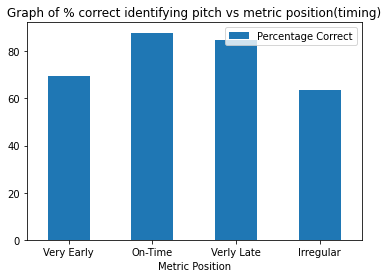

In [553]:
experimentB_all_bar = pd.DataFrame({'Metric Position':['Very Early','On-Time','Verly Late','Irregular'], 'Percentage Correct':[sequence2_all,sequence1_all,sequence4_all,sequence3_all]})
ax = experimentB_all_bar.plot.bar(x='Metric Position', y='Percentage Correct', rot=0)
ax.set_title('Graph of % correct identifying pitch vs metric position(timing)')


# Part 2 Data Analysis:

## Hypothesis (A/B) Testing:
Null: The timing of the comparison tone (the last note) relatively to the distracting tones (notes in the middle)
does not affect a participants performance in determining if the comparison tone is higher/lower/same in pitch
than than the standard tone.

In [554]:
test_statistics = []
sampling_array = np.append(experimentB["Sequence1"].array,experimentB["Sequence2"].array)
sampling_array = np.append(sampling_array,experimentB["Sequence3"].array)
sampling_array = np.append(sampling_array,experimentB["Sequence4"].array)


In [555]:

def observerd_statistic_cacl(seq='Sequence3'):
## Returns the observered statistic, which in this case is the
## % correct of the specific sequance OR % correct of Sequance 3 (normal metric position)
    sequance_test = experimentB[seq].values
    percent_correct = np.count_nonzero(sequance_test=="Correct")/len(sequance_test)
    return percent_correct
    

In [556]:
def a_b_test(seq=None,general=True):
    ##Calculates the test statistic between a sequance and general distribution.
    
   
    if general != True:
        sequance_test = experimentB[seq].sample(n=experimentB.shape[0],replace=True).values
        #Pecent correct in specific sequance distribution
        unique, counts = np.unique(sequance_test, return_counts=True)
        result = dict(zip(unique, counts))
        try:
            percent_correct = result['Correct']/len(sequance_test)
        except:
            percent_correct = 0
    else:
        #Percent correct in overall distribution    
        general_test = np.random.choice(sampling_array,size=experimentB.shape[0],replace=True)
        unique1, counts1 = np.unique(general_test, return_counts=True)
        result1 = dict(zip(unique1, counts1))
        try:
            percent_correct = result1['Correct']/len(general_test)
        except:
            percent_correct= 0

    
    #Calculate test statistic
    test_statistic = percent_correct
    return np.array([test_statistic])
    


### Sequence 1 (Normal Metric Position):  87%
F# F D E# G F# D# E F# G (G HIGHER than F#)

In [557]:
observed_statistic = observerd_statistic_cacl("Sequence1")
test_statistics = np.array([])
for i in range(0,1000):
    test_statistics = np.concatenate((test_statistics,a_b_test()))
    
p_value = 1 - np.count_nonzero(observed_statistic >= test_statistics)/1000
p_value

0.03200000000000003

#### Sequence 1 Conclusion: 
Statistically Significant when compared to general distribution.

### Sequence 2 (Very Early): 70%
G F D E# G F# D# E G F# (F# is LOWER than G)

Comparing very early with general distribution

In [558]:
observed_statistic = observerd_statistic_cacl("Sequence2")

test_statistics = np.array([])
for i in range(0,1000):
    test_statistics = np.concatenate((test_statistics,a_b_test()))
    
p_value = 1- np.count_nonzero(observed_statistic <= test_statistics)/1000
p_value

0.14200000000000002

Comparing very early with on time distribution

In [559]:
observed_statistic = observerd_statistic_cacl("Sequence1")
test_statistics = np.array([])
for i in range(0,1000):
    test_statistics = np.concatenate((test_statistics,a_b_test("Sequence2",False)))
    
p_value = 1 - np.count_nonzero(observed_statistic >= test_statistics)/1000
p_value

0.0040000000000000036

#### Sequence 2 Conclusion: 
Not statistically significant when compared to general distribution, but 
statistically significant when compared to precise metric position.

### Sequence 3 (Irregular):  64%
E F D E# G F# D# E F (F HIGHER than E)

Comparing irregular with general distribution

In [560]:
observed_statistic = observerd_statistic_cacl("Sequence3")
test_statistics = np.array([])
for i in range(0,1000):
    test_statistics = np.concatenate((test_statistics,a_b_test()))
    
p_value = np.count_nonzero(test_statistics <= observed_statistic)/1000
p_value

0.6363636363636364


0.064

Comparing irregular with on time distribution

In [561]:
observed_statistic = observerd_statistic_cacl("Sequence1")
test_statistics = np.array([])
for i in range(0,1000):
    test_statistics = np.concatenate((test_statistics,a_b_test("Sequence3",False)))
    
p_value = 1 - np.count_nonzero(observed_statistic >= test_statistics)/1000
p_value

0.0

#### Sequence 3: Conclusion: 
Statistically Significant when compared to general distribution and precise metric position.

## Sequence 4 (Very Late): 85%
F# E D E# G F D# E F# G (G HIGHER than F#)

Comparing very late with general distribution

In [562]:
observed_statistic = observerd_statistic_cacl("Sequence4")
print(observed_statistic)
test_statistics = np.array([])
for i in range(0,1000):
    test_statistics = np.concatenate((test_statistics,a_b_test()))
    
p_value = 1- np.count_nonzero(observed_statistic >= test_statistics)/1000
p_value

0.8484848484848485


0.08899999999999997

Comparing very late with on time distribution

In [563]:
observed_statistic = observerd_statistic_cacl("Sequence1")
test_statistics = np.array([])
for i in range(0,1000):
    test_statistics = np.concatenate((test_statistics,a_b_test("Sequence4",False)))
    
p_value = 1 - np.count_nonzero(observed_statistic >= test_statistics)/1000
p_value

0.23299999999999998

#### Sequence 4 Conclusion:
Not statistically significant in any comparison, though the data suggests a trend.

### Hypothesis Testing Conclusion:
- When tones were played at the precise metric position, the results were statistically significant. That is, when comapred to the overall distribution, when hearing the tone at the exact/expected timing, participants tend to perform better in determining pitch.
- When the tone was played earlier, participants on average performed worse when compared to when the tone arrived at the precise metric position. This result was also statistically significant.
- When the tone was irregular, participants on average performed worse when compared to both the overall distribution and when the tone was played at the precise metric position. This was also statistically significant. 
- I did not find statistically significant results when looking at the tone was played later, though the data suggests that participants did perform worse when compared to when the tone arrived at the precise metric position.

## Further Analysis: Effect of Correctly Identfying Timing and Pitch
Here we look further at more closely if whether there is correlation between whether a participant correctly determined the arrival sequance of the note (earlier, later, or expected) and if they anwsered correctly. That is, I look at the number of people who anwser both the timing and pitch question correctly and compare it with the number of people who only anwsered the pitch question correctly.

In [581]:
def a_b_test_performance(correct_timing,seq):
    sequance_test = correct_timing[seq].sample(n=correct_timing.shape[0],replace=True).values
    general_test = experimentB[seq].sample(n=experimentB.shape[0],replace=True).values

    #Pecent correct in specific sequanfe distribution
    unique, counts = np.unique(sequance_test, return_counts=True)
    result = dict(zip(unique, counts))
    try:
        percent_correct_sequance = result['Correct']/len(sequance_test)
    except:
        percent_correct_sequance = 0

    #Percent correct in overall distribution    
    unique1, counts1 = np.unique(general_test, return_counts=True)
    result1 = dict(zip(unique1, counts1))
    try:
        percent_correct_general = result1['Correct']/len(general_test)
    except:
        percent_correct_general = 0


    #Calculate test statistic (percent correct sequance - percent correct general distribution)
    test_statistic = percent_correct_general

    return np.array([test_statistic])


### Sequence 1 (Normal Metric Position)


In [582]:
seq1_correct_timing = experimentB[experimentB['Sequence1_Timing'] == "Expected"]
seq1_correct_timing[seq1_correct_timing["Sequence1"] == "Correct"].shape[0]/seq1_correct_timing.shape[0]*100

100.0

In [584]:
seq1_correct_timing = experimentB[experimentB['Sequence1_Timing'] != "Expected"]
seq1_correct_timing[seq1_correct_timing["Sequence1"] == "Correct"].shape[0]/seq1_correct_timing.shape[0]*100

78.94736842105263

In [583]:
a = seq1_correct_timing[seq1_correct_timing["Sequence1"] == "Correct"].shape[0]/seq1_correct_timing.shape[0]
b = experimentB[experimentB['Sequence1'] == "Correct"].shape[0]/experimentB.shape[0]
observed = a

test_statistics = np.array([])
for i in range(0,1000):
    test_statistics = np.concatenate((test_statistics,a_b_test_performance(seq1_correct_timing,"Sequence1")))

p_value = np.count_nonzero(test_statistics >= observed)/1000
p_value


0.015

#### Conclusion:
Those who correctly identified the timing of the note, performed better. This was a statistical significant effect for the normal metric position sequence.

### Sequence 2 (Very Early)


In [567]:
seq2_correct_timing = experimentB[experimentB['Sequence2_Timing'] == "Earlier"]
seq2_correct_timing[seq2_correct_timing["Sequence2"] == "Correct"].shape[0]/seq2_correct_timing.shape[0]*100


53.333333333333336

In [585]:
seq2_correct_timing = experimentB[experimentB['Sequence2_Timing'] != "Earlier"]
seq2_correct_timing[seq2_correct_timing["Sequence2"] == "Correct"].shape[0]/seq2_correct_timing.shape[0]*100


0.0

In [568]:
a = seq2_correct_timing[seq2_correct_timing["Sequence2"] == "Correct"].shape[0]/seq2_correct_timing.shape[0]
b = experimentB[experimentB['Sequence2'] == "Correct"].shape[0]/experimentB.shape[0]
observed = a 

test_statistics = np.array([])
for i in range(0,100):
    test_statistics = np.concatenate((test_statistics,a_b_test_performance(seq2_correct_timing,"Sequence2")))
    
p_value = np.count_nonzero(test_statistics <= observed)/1000
p_value


0.002

#### Conclusion:

Those who correctly identified the timing of the note, performed better. This was a statistical significant effect for the very early sequence.


### Sequence 4 (Very Late)


In [569]:
seq4_correct_timing = experimentB[experimentB['Sequence4_Timing'] == "Later"]
seq4_correct_timing[seq4_correct_timing["Sequence2"] == "Correct"].shape[0]/seq4_correct_timing.shape[0]*100



85.71428571428571

In [586]:
seq4_correct_timing = experimentB[experimentB['Sequence4_Timing'] != "Later"]
seq4_correct_timing[seq4_correct_timing["Sequence2"] == "Correct"].shape[0]/seq4_correct_timing.shape[0]*100



0.0

In [587]:
a = seq4_correct_timing[seq4_correct_timing["Sequence4"] == "Correct"].shape[0]/seq4_correct_timing.shape[0]
b = experimentB[experimentB['Sequence4'] == "Correct"].shape[0]/experimentB.shape[0]
observed = a - b

test_statistics = np.array([])
for i in range(0,1000):
    test_statistics = np.concatenate((test_statistics,a_b_test_performance(seq4_correct_timing,"Sequence4")))
    
p_value = np.count_nonzero(test_statistics <= observed)/1000
p_value


0.0

#### Conclusion:

Those who correctly identified the timing of the note, performed better. This was a statistical significant effect for the very late sequence.

## Easiest Sequence: Participant Responses
We can also see which sequence participants ranked as easiest. A graph is shown below

In [571]:
s1 = experimentB[experimentB['Easiest'] == "Question 1"].shape[0]/len(experimentB) * 100
s2 = experimentB[experimentB['Easiest'] == "Question 2"].shape[0]/len(experimentB) * 100
s3 = experimentB[experimentB['Easiest'] == "Question 3"].shape[0]/len(experimentB) * 100
s4 = experimentB[experimentB['Easiest'] == "Question 4"].shape[0]/len(experimentB) * 100


Text(0.5, 1.0, 'Metric Position vs % Responding Easiest')

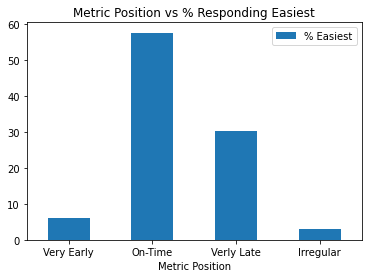

In [590]:
easiest_bar = pd.DataFrame({'Metric Position':["Very Early",'On-Time','Verly Late','Irregular'], '% Easiest':[s2,s1,s4,s3]})
ax = easiest_bar.plot.bar(x='Metric Position', y='% Easiest', rot=0)
ax.set_title('Metric Position vs % Responding Easiest')


We see that On-Time (Precise Metric Position) was rated as the easiest sequence to determine pitch.

## Additional PCA Analysis

In [591]:
experimentB_pca = experimentB[['Age',"Perfect_Pitch","Listen_Music","Years","Control","Sequence1","Sequence1_Timing","Sequence2","Sequence2_Timing","Sequence3","Sequence3_Timing","Sequence4","Sequence4_Timing","Easiest"]]

In [592]:
experimentB_pca.head()

,Age,Perfect_Pitch,Listen_Music,Years,Control,Sequence1,Sequence1_Timing,Sequence2,Sequence2_Timing,Sequence3,Sequence3_Timing,Sequence4,Sequence4_Timing,Easiest
0,20.0,No,Yes,5,Higher,Incorrect,Earlier,Incorrect,Expected,Correct,Later,Incorrect,Later,Question 1
1,20.0,No,Yes,0,Higher,Correct,Later,Incorrect,Later,Correct,Expected,Correct,Later,Question 1
2,20.0,No,Yes,8,Higher,Correct,Expected,Incorrect,Earlier,Correct,Earlier,Correct,Expected,Question 4
4,18.0,No,Yes,4,Higher,Correct,Earlier,Incorrect,Later,Incorrect,Earlier,Correct,Expected,Question 1
5,20.0,No,Yes,3,Higher,Correct,Expected,Incorrect,Earlier,Correct,Expected,Correct,Expected,Question 1


In [593]:

experimentB.loc[(experimentB.Sequence2 != 'Lower'),'Sequence2']='Incorrect'
experimentB_pca.loc[(experimentB_pca.Perfect_Pitch == "No"),'Perfect_Pitch'] = 0
experimentB_pca.loc[(experimentB_pca.Listen_Music  == "Yes"),'Listen_Music'] = 1
experimentB_pca.loc[(experimentB_pca.Control  == "Higher"),'Control'] = 1
experimentB_pca.loc[(experimentB_pca.Sequence1  == "Correct"),'Sequence1'] = 1
experimentB_pca.loc[(experimentB_pca.Sequence1  == "Incorrect"),'Sequence1'] = 0

experimentB_pca.loc[(experimentB_pca.Sequence1_Timing  != "Expected"),'Sequence1_Timing'] = 0
experimentB_pca.loc[(experimentB_pca.Sequence1_Timing  == "Expected"),'Sequence1_Timing'] = 1


experimentB_pca.loc[(experimentB_pca.Sequence2  == "Correct"),'Sequence2'] = 1
experimentB_pca.loc[(experimentB_pca.Sequence2  == "Incorrect"),'Sequence2'] = 0

experimentB_pca.loc[(experimentB_pca.Sequence2_Timing  != "Earlier"),'Sequence2_Timing'] = 0
experimentB_pca.loc[(experimentB_pca.Sequence2_Timing  == "Earlier"),'Sequence2_Timing'] = 1

experimentB_pca.loc[(experimentB_pca.Sequence3  == "Correct"),'Sequence3'] = 1
experimentB_pca.loc[(experimentB_pca.Sequence3  == "Incorrect"),'Sequence3'] = 0

experimentB_pca.loc[(experimentB_pca.Sequence3_Timing  != "Earlier"),'Sequence3_Timing'] = 0
experimentB_pca.loc[(experimentB_pca.Sequence3_Timing  == "Earlier"),'Sequence3_Timing'] = 1

experimentB_pca.loc[(experimentB_pca.Sequence4  == "Correct"),'Sequence4'] = 1
experimentB_pca.loc[(experimentB_pca.Sequence4  == "Incorrect"),'Sequence4'] = 0

experimentB_pca.loc[(experimentB_pca.Sequence4_Timing  != "Earlier"),'Sequence4_Timing'] = 0
experimentB_pca.loc[(experimentB_pca.Sequence4_Timing  == "Earlier"),'Sequence4_Timing'] = 1

experimentB_pca.loc[(experimentB_pca.Perfect_Pitch  == "Yes"),'Perfect_Pitch'] = 1
experimentB_pca.loc[(experimentB_pca.Perfect_Pitch  == "No"),'Perfect_Pitch'] = 0


experimentB_pca.loc[(experimentB_pca.Listen_Music  == "Yes"),'Listen_Music'] = 1
experimentB_pca.loc[(experimentB_pca.Listen_Music == "No"),'Listen_Music'] = 0


experimentB_pca.loc[(experimentB_pca.Easiest == "Question 1"),'Easiest'] = 1
experimentB_pca.loc[(experimentB_pca.Easiest == "Question 2"),'Easiest'] = 2
experimentB_pca.loc[(experimentB_pca.Easiest == "Question 3"),'Easiest'] = 3
experimentB_pca.loc[(experimentB_pca.Easiest == "Question 4"),'Easiest'] = 4

/usr/local/Cellar/jupyterlab/2.1.4/libexec/lib/python3.8/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [594]:
experimentB_pca.dropna(inplace=True)

<ipython-input-594-79331e49c523>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  experimentB_pca.dropna(inplace=True)


In [595]:
A = np.matrix(experimentB_pca.values,dtype='float')


In [596]:
u, s, vh = np.linalg.svd(A, full_matrices=True)

In [599]:
np.matmul(np.transpose(A),u[0].transpose())

matrix([[ 5.19275744],
        [-0.10931298],
        [ 0.51528542],
        [ 6.22273375],
        [ 0.26353506],
        [ 0.65037822],
        [-0.53663806],
        [ 0.        ],
        [-0.1469364 ],
        [ 0.37296439],
        [ 0.23663926],
        [ 1.32019484],
        [ 0.03654428],
        [ 1.38043313]])

In [600]:
np.matmul(np.transpose(A),u[1].transpose())

matrix([[17.20064809],
        [ 1.13270663],
        [ 0.95897768],
        [15.18175726],
        [ 0.89655186],
        [ 0.91294927],
        [-0.25058158],
        [ 0.        ],
        [-0.36889696],
        [ 0.71775517],
        [ 0.82161319],
        [ 1.02842581],
        [ 0.18363677],
        [ 4.46735911]])

No significant conclusions drawn form PCA analysis.

In [601]:
experimentB_pca

,Age,Perfect_Pitch,Listen_Music,Years,Control,Sequence1,Sequence1_Timing,Sequence2,Sequence2_Timing,Sequence3,Sequence3_Timing,Sequence4,Sequence4_Timing,Easiest
0,20.0,0,1,5,1,0,0,0,0,1,0,0,0,1
1,20.0,0,1,0,1,1,0,0,0,1,0,1,0,1
2,20.0,0,1,8,1,1,1,0,1,1,1,1,0,4
4,18.0,0,1,4,1,1,0,0,0,0,1,1,0,1
5,20.0,0,1,3,1,1,1,0,1,1,0,1,0,1
6,20.0,0,1,16,1,1,0,0,0,1,1,1,1,4
7,20.0,0,1,16,1,1,0,0,0,1,1,1,1,4
8,20.0,0,1,0,1,1,0,0,0,1,0,1,0,1
9,20.0,0,1,10,1,0,0,0,1,0,1,1,0,4
10,20.0,0,1,10,1,1,0,0,1,0,0,1,1,1


### PCA Conclusions:
- PCA analysis appears to be speculative at best. However, some potential insights maybe:
    - There appears to be a connection in identifying sequance 3 and 3's timing, as well as  sequance 4 and 4's timing.
    - There appears to be (weak) connection in a person getting multiple sequances right. That is, if I get sequance 1 right, I may be more likely to get 4 right too.
    - Correctness and the responses to "easiest" appears to be correlated. In this case, Sequance 1 and Sequance 4 had high correctness %, and were also the most frequent response when participants were asked which sequance was easiest.